# **Fastai - From Data to DataLoaders (for images)**

The fast book is imported and set up


In [ ]:
!pip install -Uqq fastbook
!pip install scikit-learn
import fastbook
fastbook.setup_book()
!pip install -Uqq fastai


In [ ]:
from fastbook import *
from fastai.vision.widgets import *


ModuleNotFoundError: ignored

Next we unzip the zip file containing the sea birds

In [ ]:
!unzip SeaBirdsData.zip

Archive:  SeaBirdsData.zip
  inflating: SeaBirds/.DS_Store      
   creating: SeaBirds/ducks/
  inflating: SeaBirds/ducks/duck1_0.jpeg  
  inflating: SeaBirds/ducks/duck1_1.jpeg  
  inflating: SeaBirds/ducks/duck1_11.jpeg  
  inflating: SeaBirds/ducks/duck1_12.jpeg  
  inflating: SeaBirds/ducks/duck1_14.jpeg  
  inflating: SeaBirds/ducks/duck1_17.jpeg  
  inflating: SeaBirds/ducks/duck1_18.jpeg  
  inflating: SeaBirds/ducks/duck1_2.jpeg  
  inflating: SeaBirds/ducks/duck1_20.jpeg  
  inflating: SeaBirds/ducks/duck1_21.jpeg  
  inflating: SeaBirds/ducks/duck1_24.jpeg  
  inflating: SeaBirds/ducks/duck1_25.jpeg  
  inflating: SeaBirds/ducks/duck1_26.jpeg  
  inflating: SeaBirds/ducks/duck1_28.jpeg  
  inflating: SeaBirds/ducks/duck1_30.jpeg  
  inflating: SeaBirds/ducks/duck1_32.jpeg  
  inflating: SeaBirds/ducks/duck1_33.jpeg  
  inflating: SeaBirds/ducks/duck1_34.jpeg  
  inflating: SeaBirds/ducks/duck1_35.jpeg  
  inflating: SeaBirds/ducks/duck1_36.jpeg  
  inflating: SeaBirds/ducks/d

Now I try to pull up an image of a duck, just to see if it is there in the directory

In [ ]:
# If you want to use option1:
path = '/content/gdrive/MyDrive/Dataset/data/data/'

In [ ]:
# If you want to use option2:
path = '/content/SeaBirds/'

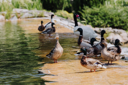

In [ ]:
from PIL import Image

im = Image.open(path + 'ducks/duck1_0.jpeg')
im.to_thumb(128,128)

The variable *filenames* is made that contains a listing of all paths to all files in the birds folder

In [ ]:
from fastai.vision.all import *
filenames = get_image_files(path)
filenames

(#2000) [Path('/content/SeaBirds/penguins/penguin4_8.jpeg'),Path('/content/SeaBirds/penguins/penguin1_51.jpeg'),Path('/content/SeaBirds/penguins/penguin3_40.jpeg'),Path('/content/SeaBirds/penguins/penguin1_62.jpeg'),Path('/content/SeaBirds/penguins/penguin4_48.jpeg'),Path('/content/SeaBirds/penguins/penguin4_71.jpeg'),Path('/content/SeaBirds/penguins/penguin1_59.jpeg'),Path('/content/SeaBirds/penguins/penguin3_91.jpeg'),Path('/content/SeaBirds/penguins/penguin4_23.jpeg'),Path('/content/SeaBirds/penguins/penguin3_25.jpeg')...]

All images are checked, to make sure none of them are corrupt files:

In [ ]:
failed = verify_images(filenames)
failed

(#0) []

# **DataLoaders**

Next I use a wrapper class from Fastai, Dataloaders, which wrapped around our images from training and validation which enables other fastai

In [ ]:
!pip install nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.7 MB/s eta 0:00:00


# **Fastai data block API**
Our dataloader object is created in a fully adjustable way
We specifie the types of data blocks to use, it's an ImageBlock for handling image data and a CategoryBlock for handling categorical labels.

Next we define how to get the items (file paths) for the dataset by using the get_image_files function, which retrieves image files from a given directory.A RandomSplitter is used to randomly split the data into training and validation sets.

20% of the data will be used for validation, and seed=42 ensures that it is can be reproduced.

We then use the parent_label function to get the label based on the parent directory of each image.

Item transformations are then applied to the data. it resizes each image to a square of size 128x128 using the Resize transformation and randomizes the cropping.

In [ ]:
seaBirdsDls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(128, min_scale=0.3))


Now we have our custom DataLoader template for our SeaBirds. Next we give our dls the path to where it can find the sea birds data.

In [ ]:
dls = seaBirdsDls.dataloaders(path)

Then we check if we can access our sea birds

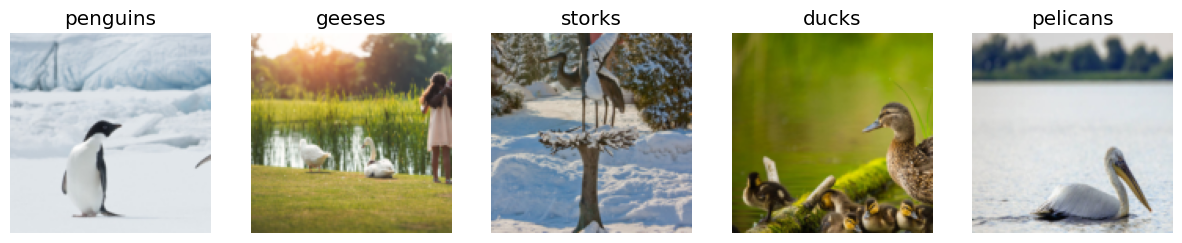

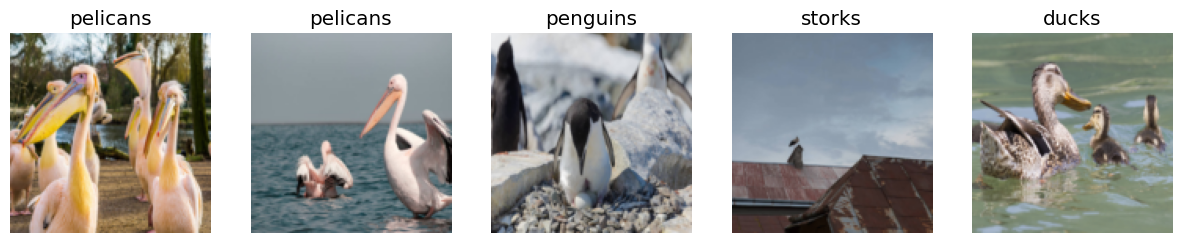

In [ ]:
dls.train.show_batch(max_n=5, nrows=1)
dls.valid.show_batch(max_n=5, nrows=1)

<h2>Without any tweaking and techniques</h2>
Using vgg with pretrained weight we fine-tune it automatically
A learner is set up with a VGG16 architecture, a DataLoader (dls), and an error rate metric.
and then we Fine-tune the model for 2 additional epochs, adapting it to our dataset

In [ ]:
vgg16_model = vision_learner(dls, vgg16_bn, metrics=error_rate)
vgg16_model.fine_tune(2)



# from fastai.metrics import error_rate, RocAuc
# from fastai.vision.learner import cnn_learner
# import matplotlib.pyplot as plt


# # Assuming your problem is multi-label classification

# num_classes = 5

# # vgg16_model = cnn_learner(dls, vgg16_bn, metrics=[error_rate, RocAuc()], n_out=num_classes)

# # # Fine-tune the model
# # vgg16_model.fine_tune(2)

# preds, targets = vgg16_model.get_preds()

# # Plot ROC-AUC curves for each class
# for i in range(num_classes):
#     fpr, tpr, _ = roc_curve(targets[:, i], preds[:, i])
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC-AUC Curves for Multi-label Classification')
# plt.legend(loc='best')
# plt.show()




# from fastai.metrics import error_rate, RocAuc
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Assuming your problem is multi-label classification
# # dls = ...  # Your DataLoader
# num_classes = 5

# # vgg16_model = cnn_learner(dls, vgg16_bn, metrics=[error_rate, RocAuc()], n_out=num_classes)

# # # Fine-tune the model
# # vgg16_model.fine_tune(2)

# # Get predictions and true labels for the validation set
# preds, targets = vgg16_model.get_preds()

# # Convert tensors to numpy arrays
# preds_np = preds.numpy()
# targets_np = targets.numpy()

# # Plot ROC-AUC curves for each class
# for i in range(num_classes):
#     fpr, tpr, _ = roc_curve(targets_np[:, i], preds_np[:, i])
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC-AUC Curves for Multi-label Classification')
# plt.legend(loc='best')
# plt.show()

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:09<00:00, 59.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.450821,0.269914,0.097500,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.376717,0.128468,0.037500,00:14
1,0.281928,0.115590,0.032500,00:14


These are good numbers for the confusion matrix, the true positives for the different categories are much higher than other numbers.

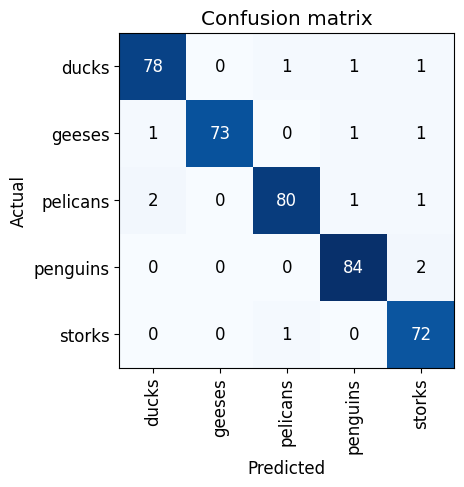

In [ ]:
interp = ClassificationInterpretation.from_learner(vgg16_model)
interp.plot_confusion_matrix()

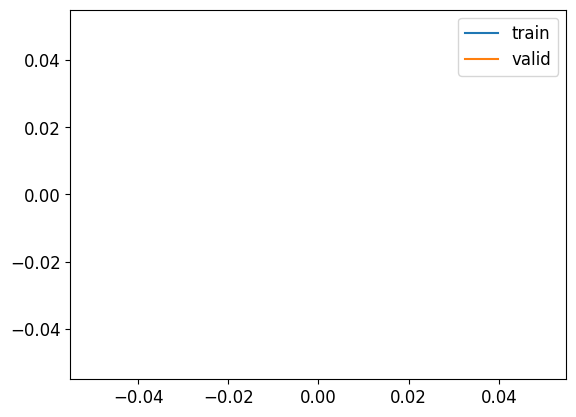

In [ ]:
vgg16_model.recorder.plot_loss()

As you can tell in the learning rate chart, the loss is pretty low with a learning rate of around 10-4

SuggestedLRs(valley=0.0002290867705596611)

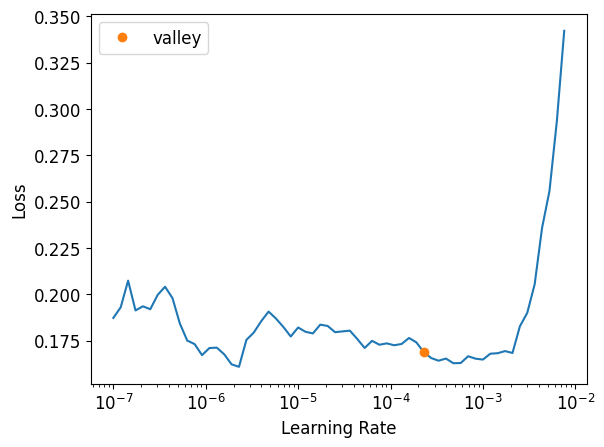

In [ ]:
vgg16_model.lr_find()

Okay, this is just on a tiny dataset...but not bad...Only one or two (depends on your random selected data) wrong out of the 20 on the validation set...let's see which ones our model has most difficulties with...

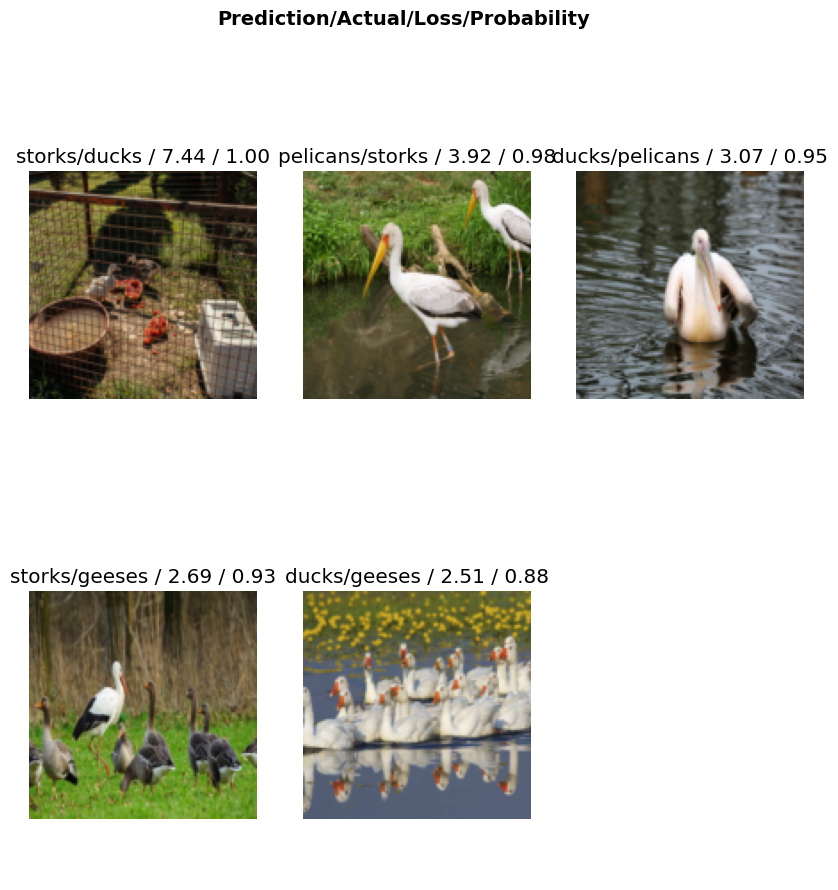

In [ ]:
interp.plot_top_losses(5, nrows=2, figsize=(10, 10))


(if the top losses function only draws one image, check: https://forums.fast.ai/t/plot-top-losses-problem/92015/10 for a fix)



Okay. Fair enough...probably with some more data, and augmentation techniques, and some more awesome level_ups we would be better at this...but not bad at all for our first run at it!

Let's save and export our model, so we can deploy it later to be used in a webpage.

In [ ]:
# saving our model, by default in a folder called 'models'.
vgg16_model.save('first_model')
#creating an serialized pickle object of our model, the export.pkl file
vgg16_model.export()


Prediction: ducks, Probability: 0.9956


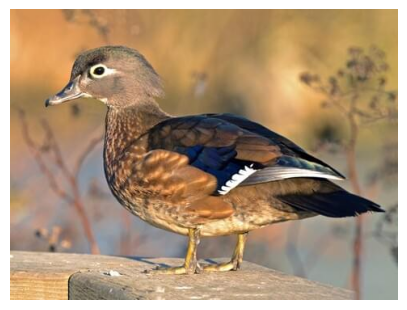

In [ ]:
from fastai.vision.all import *

img = PILImage.create('/content/CustomPredict/duckpredict.jpg')
img.show()

# Make a prediction
pred, pred_idx, probs = vgg16_model.predict(img)
print(f"Prediction: {vgg16_model.dls.vocab[pred_idx]}, Probability: {probs[pred_idx]:.4f}")

Learning Rate

Mixed Precision Training

In [ ]:
from fastai.callback.fp16 import *
vgg16_adv_tweaked = vision_learner(dls, vgg16_bn, metrics=error_rate).to_fp16()
vgg16_adv_tweaked.fine_tune(6, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,1.935268,0.640790,0.230000,00:20
1,1.059038,0.196841,0.062500,00:12
2,0.706378,0.147740,0.052500,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.278164,0.113132,0.042500,00:13
1,0.214672,0.097018,0.032500,00:13
2,0.177832,0.104961,0.025000,00:12
3,0.138694,0.099102,0.025000,00:12
4,0.114942,0.084417,0.025000,00:14
5,0.089558,0.082541,0.022500,00:15


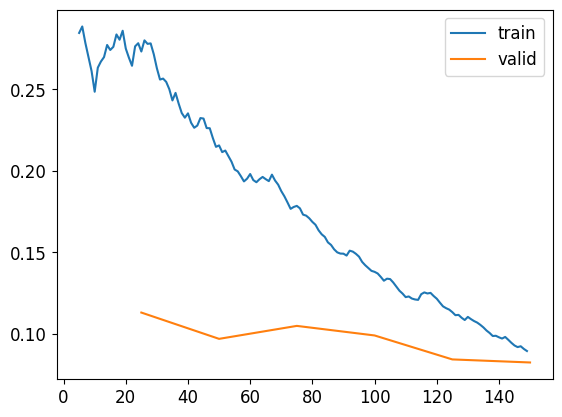

In [ ]:
vgg16_adv_tweaked.recorder.plot_loss()

In [ ]:


vgg16_adv_tweaked = vision_learner(dls, vgg16_bn, metrics=error_rate).to_fp16()
tfms = aug_transforms()
dls.after_batch(tfms)
vgg16_adv_tweaked.fine_tune(6, freeze_epochs=3)




epoch,train_loss,valid_loss,error_rate,time
0,1.877310,0.624951,0.215000,00:14
1,1.045617,0.219942,0.067500,00:11
2,0.695274,0.196677,0.057500,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.266094,0.159862,0.045000,00:14
1,0.243897,0.113222,0.037500,00:13
2,0.188227,0.110090,0.027500,00:12
3,0.141349,0.094387,0.017500,00:12
4,0.110677,0.095889,0.017500,00:13
5,0.088991,0.092219,0.015000,00:13


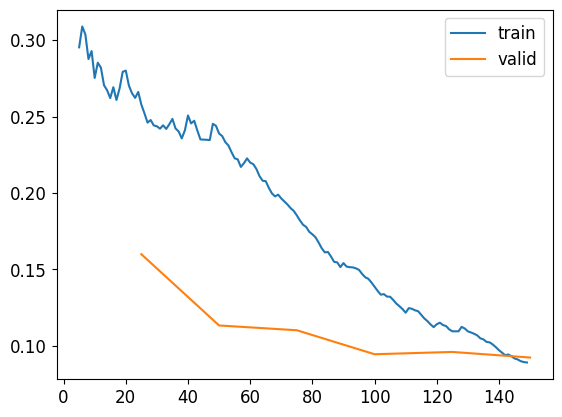

In [ ]:
vgg16_adv_tweaked.recorder.plot_loss()

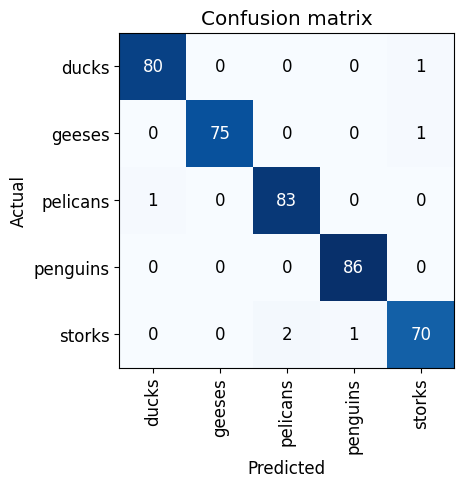

In [ ]:
interp = ClassificationInterpretation.from_learner(vgg16_adv_tweaked)
interp.plot_confusion_matrix()

SuggestedLRs(valley=1.4454397387453355e-05)

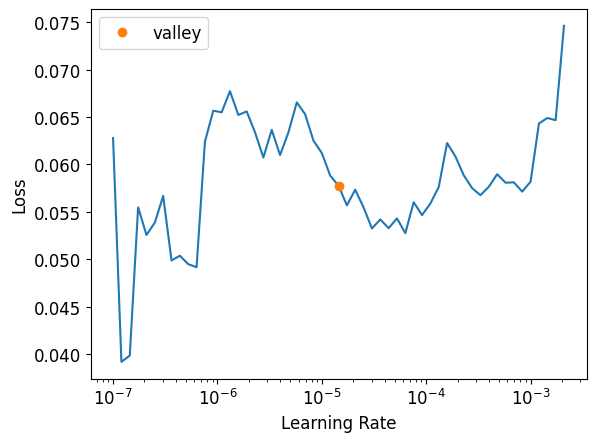

In [ ]:
vgg16_adv_tweaked.lr_find()

In [ ]:
# saving our model, by default in a folder called 'models'.
vgg16_adv_tweaked.save('second_model')
#creating an serialized pickle object of our model, the export.pkl file
vgg16_adv_tweaked.export()

Prediction: ducks, Probability: 0.9938


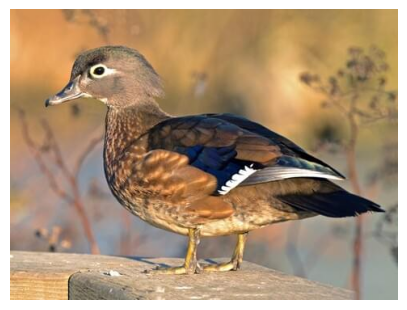

In [ ]:
from fastai.vision.all import *

img = PILImage.create('/content/CustomPredict/duckpredict.jpg')
img.show()

# Make a prediction
pred, pred_idx, probs = vgg16_adv_tweaked.predict(img)
print(f"Prediction: {vgg16_adv_tweaked.dls.vocab[pred_idx]}, Probability: {probs[pred_idx]:.4f}")

Comparing with Google

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/GooglesModel/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/GooglesModel/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/CustomPredict/duckpredict.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 1s 824ms/step
Class: Duck
Confidence Score: 0.9978974


In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import os



# Define the paths to your datasets
dataset_paths = ["/content/SeaBirds/ducks", "/content/SeaBirds/geeses", "/content/SeaBirds/pelicans", "/content/SeaBirds/penguins", "/content/SeaBirds/storks"]

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through all images in each dataset
for dataset_path in dataset_paths:
    for filename in os.listdir(dataset_path):
        if filename.endswith(".jpeg"):
            # Load and preprocess the image
            image_path = os.path.join(dataset_path, filename)
            image = Image.open(image_path).convert("RGB")
            image = ImageOps.fit(image, (224, 224), Image.Resampling.LANCZOS)
            image_array = np.asarray(image)
            normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
            data = np.expand_dims(normalized_image_array, axis=0)

            # Predict the class
            prediction = model.predict(data)
            predicted_class_idx = np.argmax(prediction)
            predicted_class_name = class_names[predicted_class_idx].strip()

            # Extract the true class from the filename or your dataset structure
            true_class_name = filename.split("_")[0]  # Replace with your logic

            # Append true and predicted labels to the lists
            true_labels.append(true_class_name)
            predicted_labels.append(predicted_class_name)

# Create confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=class_names)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:")
print(class_report)


1/1 [==============================] - 0s 26ms/step


KeyboardInterrupt: ignored

Make sure you manually download the export.pkl file (and the first_model.pth if need be)! Because Colab will remove files in its session memory after the session is complete. Plus, later on, we will run a Flask API service on our local machine, so we need the serialized model.

In [ ]:
ls

export.pkl  gdrive/  models/  sample_data/  SeaBirds/  SeaBirdsData.zip


# **Loading a model & inference:**

In [ ]:
vgg16_inference = load_learner('export.pkl')
# let's test our model on an image
# our_out_of_the_box_model_inference.predict(path + 'cat/cat.1.jpg')
# this will return the predicted category, the index of this predicted category, and the probabilities of each category

('cat', tensor(0), tensor([0.9940, 0.0060]))

In [ ]:
our_out_of_the_box_model_inference.dls.vocab

['cat', 'dog']

Alright! So we can load our serialized model, hand it an image, and it will return a prediction.

Next step is ofcourse making a Python API wrapper around this model, so we can use JSON to upload an image, and get the predictions returned. This is where Flask comes in! Flask is a Python micro framework, with a really easy to use API wrapper.

Now, you should already have enough information to go ahead and build a prototype of your Computer Vision project assignment! You could even start to research a little bit around Flask API and how they are used to 'deploy', or provide an interface to, a serialized (pickle) Deep Learning model...